# Group 5 Project ADS 502 Project
Members: Maria Mora Mora, Tanya Ortega, Graham Ward

Data set: HR Analytics, Predicting Data Science Job Change

In [ ]:
# Import libraries for the project
import pandas as pd
import numpy as np

## Section 1: Data Importing and Pre-processing

In [4]:
# Importing the dataset
df = pd.read_csv('aug_train.csv')
aug_train = df.copy()

print(aug_train.head())

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

After printing the data frame head we will start the pre processing of the data and getting a feel for its shape.

In [5]:
# Get the initial shape of the data frame
print(aug_train.shape)

(10236, 14)


In [6]:
# Get the data types of the columns
print(aug_train.dtypes)

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours            float64
target                    float64
dtype: object


In [7]:
# Identifying the missing values
print(aug_train.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    2358
relevent_experience          0
enrolled_university        203
education_level            244
major_discipline          1521
experience                  29
company_size              3194
company_type              3269
last_new_job               230
training_hours               1
target                       1
dtype: int64


In [8]:
# Get unique counts of gender column
print(aug_train['gender'].value_counts(), '\n')
# Get unique items in enrolled_university column
print(aug_train['enrolled_university'].value_counts(), '\n')
# Get unique items in education_level column
print(aug_train['education_level'].value_counts(), '\n')
# Get unique items in major_discipline column
print(aug_train['major_discipline'].value_counts(), '\n')
# Get unique items in experience column
print(aug_train['experience'].value_counts(), '\n')
# Get unique items in company_size column
print(aug_train['company_size'].value_counts(), '\n')
# Get unique items in company_type column
print(aug_train['company_type'].value_counts(), '\n')
# Get unique items in last_new_job column
print(aug_train['last_new_job'].value_counts())

gender
Male      7133
Female     642
Other      103
Name: count, dtype: int64 

enrolled_university
no_enrollment       7366
Full time course    2032
Part time course     635
Name: count, dtype: int64 

education_level
Graduate          6179
Masters           2325
High School       1100
Phd                221
Primary School     167
Name: count, dtype: int64 

major_discipline
STEM               7727
Humanities          359
Other               207
Business Degree     169
Arts                140
No Major            113
Name: count, dtype: int64 

experience
>20    1745
5       762
4       761
3       726
6       645
2       609
7       568
9       533
10      524
8       411
11      368
15      348
14      314
1       310
<1      286
16      271
12      243
13      211
17      166
19      165
18      159
20       82
Name: count, dtype: int64 

company_size
50-99        1661
100-500      1391
10000+       1068
10/49         759
1000-4999     729
<10           700
500-999       456
5000-99

In [9]:
# create a data frame that will be cleaned missing values
cleaned_df = aug_train.copy()

# Drop missing gender values
cleaned_df.dropna(subset=['gender'], inplace=True)
# Impute missing of enrolled_university column using mode
cleaned_df['enrolled_university'].fillna(cleaned_df['enrolled_university'].mode()[0], inplace=True)
# impute the missing values of education_level column using mode
cleaned_df['education_level'].fillna(cleaned_df['education_level'].mode()[0], inplace=True)
# impute the missing values of major_discipline column using mode
cleaned_df['major_discipline'].fillna(cleaned_df['major_discipline'].mode()[0], inplace=True)
# Drop the missing values of experience column
cleaned_df.dropna(subset=['experience'], inplace=True)
# impute the missing values of company_size column using XXXXXXXXX
cleaned_df.dropna(subset=['company_size'], inplace=True)
# impute the missing values of company_type column using XXXXXXXXX
cleaned_df.dropna(subset=['company_type'], inplace=True)
# Drop the missing values of last_new_job column
cleaned_df.dropna(subset=['last_new_job'], inplace=True)
# Get the shape of the cleaned data frame
print(cleaned_df.shape)
print(cleaned_df.isnull().sum())


(5248, 14)
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


In [10]:
# Dropping the missing values and creating a new data frame
aug_train_dropped = aug_train.dropna()
print(aug_train_dropped.shape)
print(aug_train_dropped.isnull().sum())

(4830, 14)
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
aug_train_dropped.to_csv('aug_train_dropped.csv', index=False)


### Data Exploration

# Exploring target:

1 = looking for new job

0 = not looking for new job

In [ ]:
import plotly.express as px

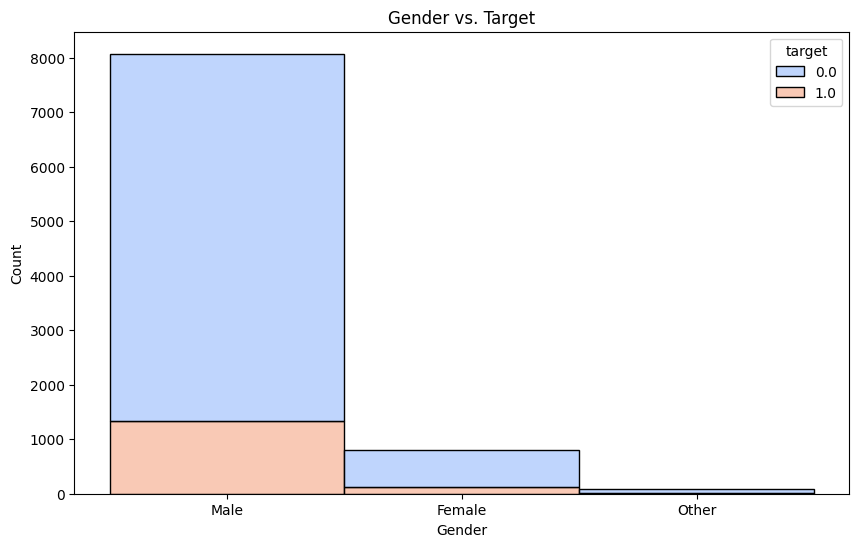

In [ ]:
# Stacked bar plot: Gender vs. Target
plt.figure(figsize=(10, 6))
sns.histplot(data=aug_train_dropped, x='gender', hue='target', multiple='stack', palette='coolwarm')
plt.title('Gender vs. Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

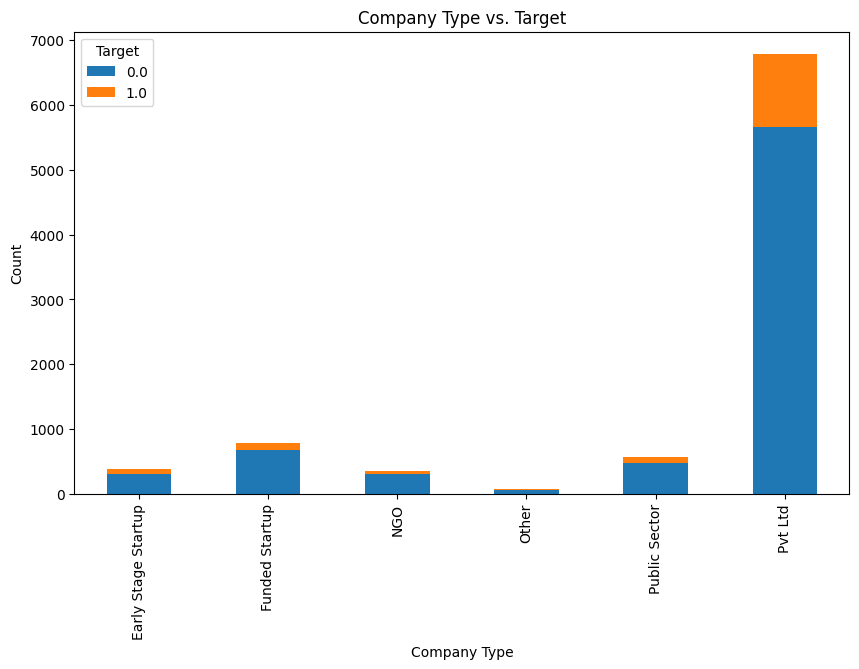

In [ ]:
# Create a cross-tabulation of company_type and target
company_target_crosstab = pd.crosstab(aug_train_dropped['company_type'], aug_train_dropped['target'])

# Plot the stacked bar plot
company_target_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Company Type vs. Target')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

<ipython-input-69-677956b59ac5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



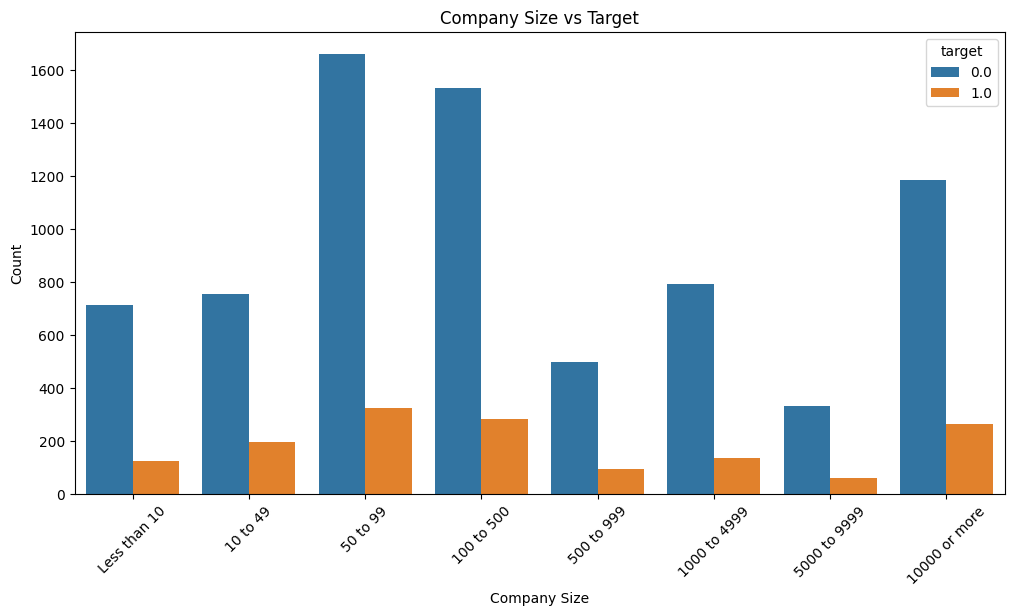

In [ ]:
# Define the correct order for company size categories
size_order = ['Less than 10', '10 to 49', '50 to 99', '100 to 500', '500 to 999', '1000 to 4999', '5000 to 9999', '10000 or more']
aug_train_dropped['company_size'] = pd.Categorical(aug_train_dropped['company_size'], categories=size_order, ordered=True)

# Recreate the plots
# 1. Bar plot: Company Size vs. Target
plt.figure(figsize=(12, 6))
sns.countplot(x='company_size', hue='target', data=aug_train_dropped, order=size_order)
plt.title('Company Size vs Target')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

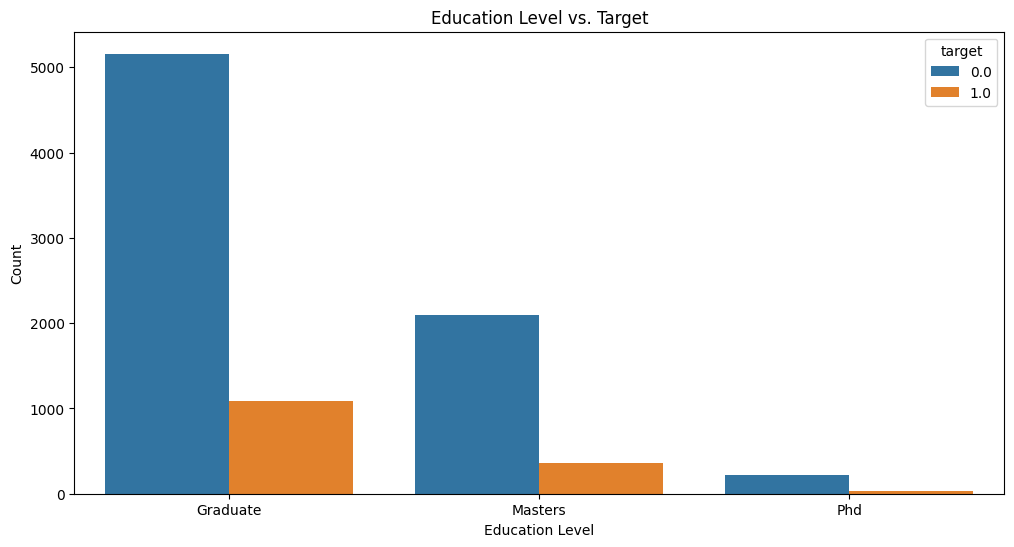

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education_level', hue='target', data=aug_train_dropped)
plt.title('Education Level vs. Target')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

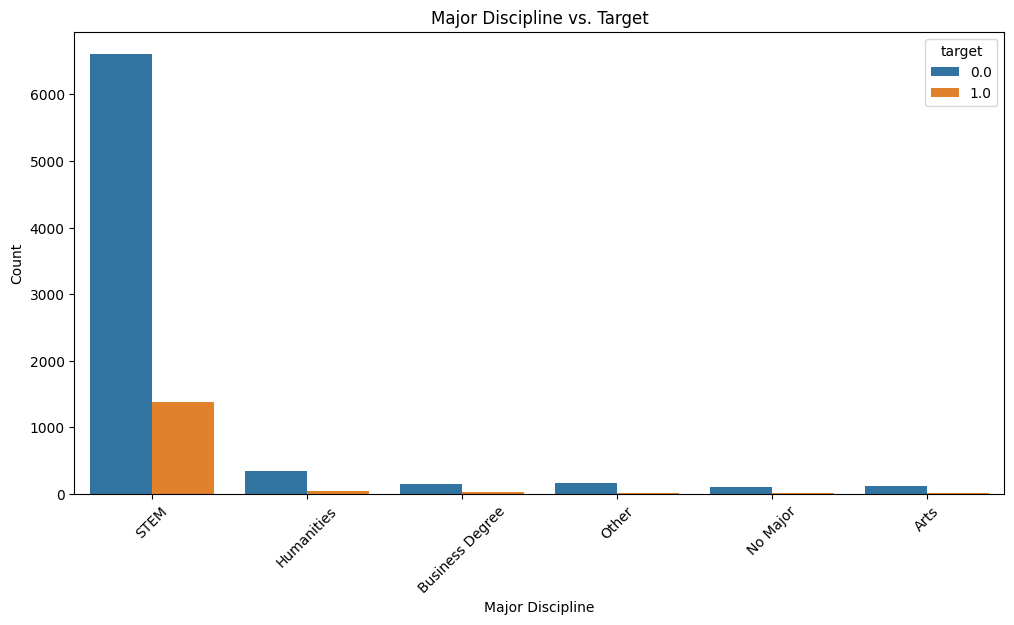

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='major_discipline', hue='target', data=aug_train_dropped)
plt.title('Major Discipline vs. Target')
plt.xlabel('Major Discipline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

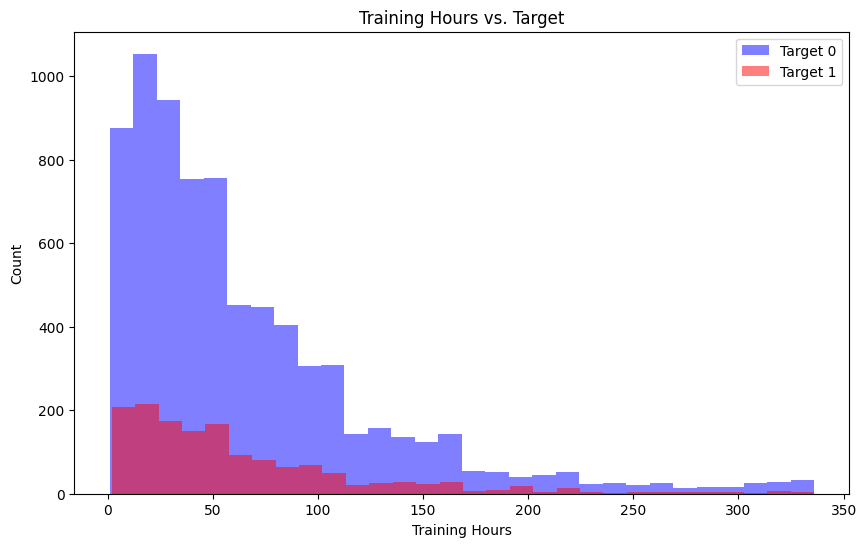

In [ ]:
# Create bins for training_hours
bins = 30

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the histogram for target=0
plt.hist(aug_train_dropped[aug_train_dropped['target'] == 0]['training_hours'], bins=bins, alpha=0.5, label='Target 0', color='blue')

# Plot the histogram for target=1
plt.hist(aug_train_dropped[aug_train_dropped['target'] == 1]['training_hours'], bins=bins, alpha=0.5, label='Target 1', color='red')

# Add titles and labels
plt.title('Training Hours vs. Target')
plt.xlabel('Training Hours')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plot
plt.show()

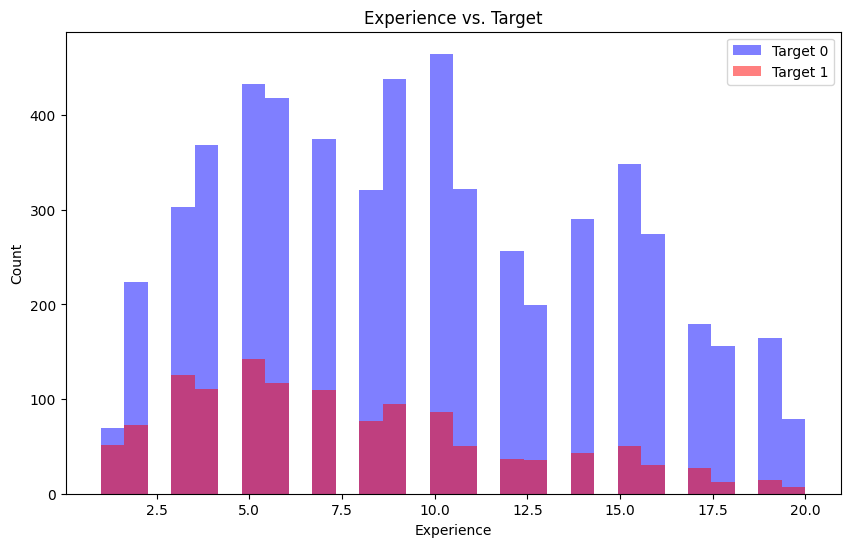

In [ ]:
# Create bins for experience
bins = 30  # Adjust this number to change the number of bins

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the histogram for target=0
plt.hist(aug_train_dropped[aug_train_dropped['target'] == 0]['experience'], bins=bins, alpha=0.5, label='Target 0', color='blue')

# Plot the histogram for target=1
plt.hist(aug_train_dropped[aug_train_dropped['target'] == 1]['experience'], bins=bins, alpha=0.5, label='Target 1', color='red')

# Add titles and labels
plt.title('Experience vs. Target')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plot
plt.show()

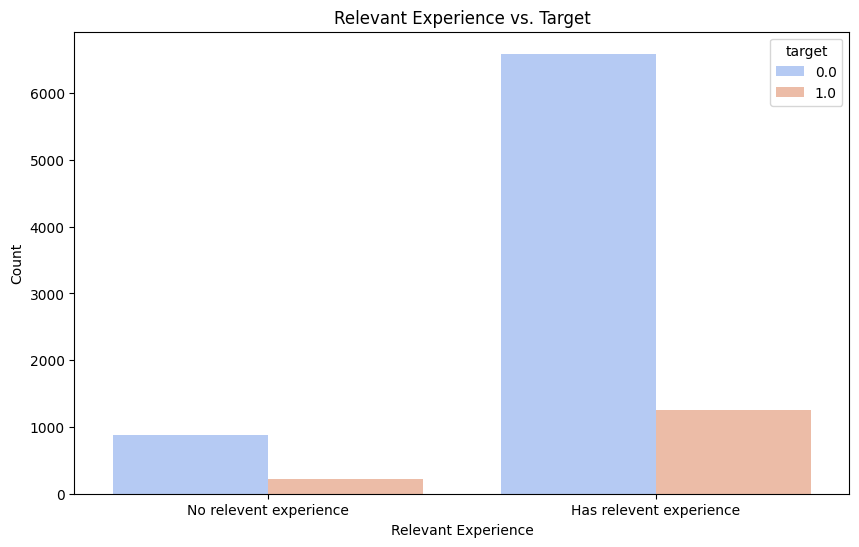

In [ ]:
# Bar plot: Relevant Experience vs. Target
plt.figure(figsize=(10, 6))
sns.countplot(x='relevent_experience', hue='target', data=aug_train_dropped, palette='coolwarm')
plt.title('Relevant Experience vs. Target')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.show()

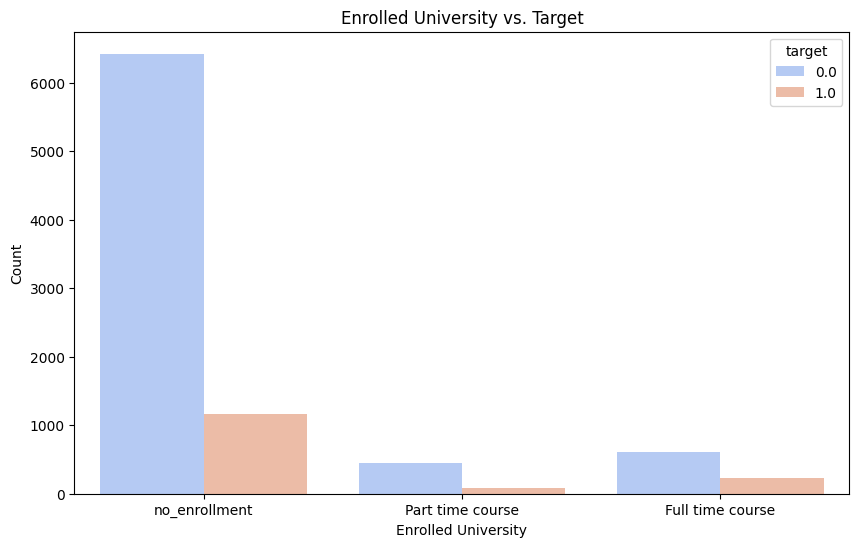

In [ ]:
# Bar plot: Enrolled University vs. Target
plt.figure(figsize=(10, 6))
sns.countplot(x='enrolled_university', hue='target', data=aug_train_dropped, palette='coolwarm')
plt.title('Enrolled University vs. Target')
plt.xlabel('Enrolled University')
plt.ylabel('Count')
plt.show()


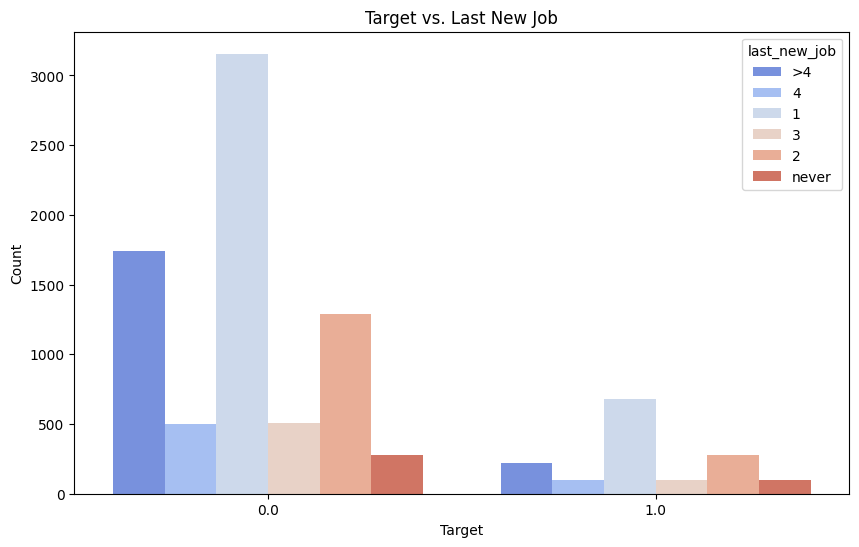

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', hue='last_new_job', data=aug_train_dropped, palette='coolwarm')
plt.title('Target vs. Last New Job')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


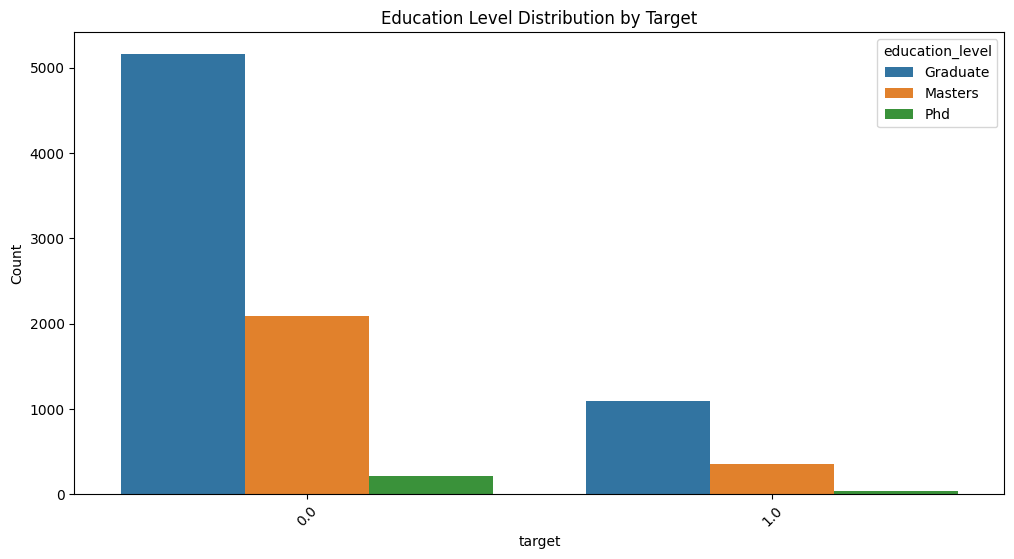

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='target', hue='education_level', data=aug_train_dropped)
plt.title('Education Level Distribution by Target')
plt.xlabel('target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

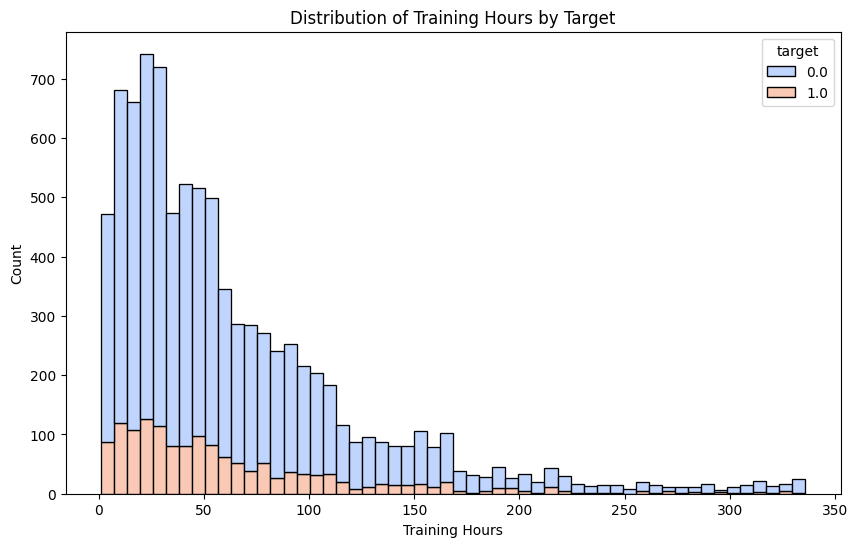

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=aug_train_dropped, x='training_hours', hue='target', multiple='stack', palette='coolwarm')
plt.title('Distribution of Training Hours by Target')
plt.xlabel('Training Hours')
plt.ylabel('Count')
plt.show()

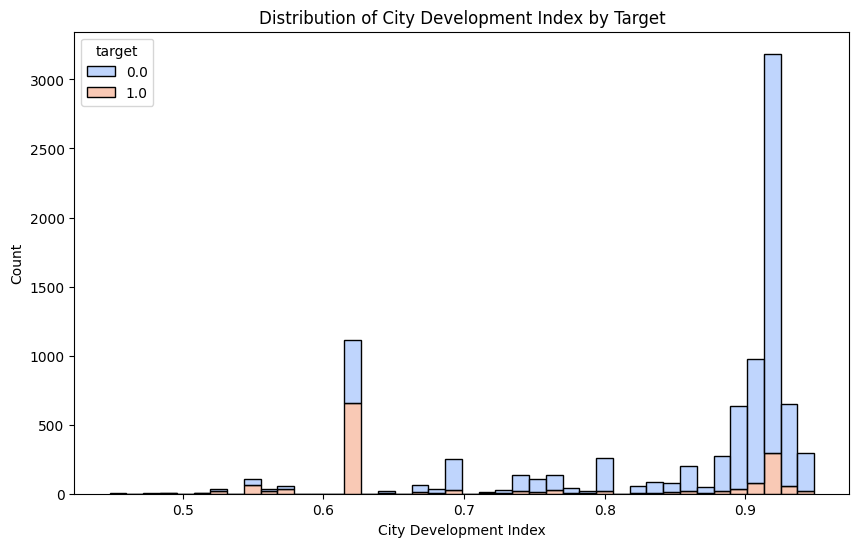

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=aug_train_dropped, x='city_development_index', hue='target', multiple='stack', palette='coolwarm')
plt.title('Distribution of City Development Index by Target')
plt.xlabel('City Development Index')
plt.ylabel('Count')
plt.show()

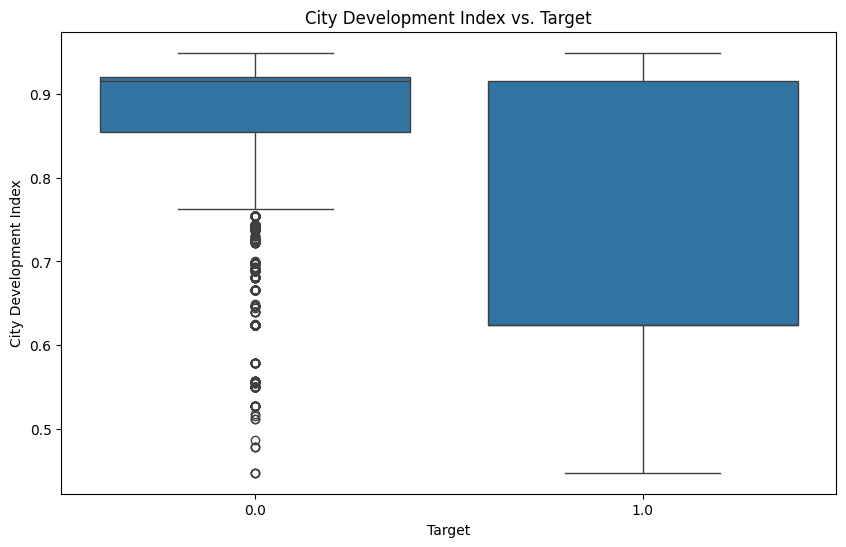

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='city_development_index', data=aug_train_dropped)
plt.title('City Development Index vs. Target')
plt.xlabel('Target')
plt.ylabel('City Development Index')
plt.show()

In [ ]:
# Histogram for Training Hours
training_hours_hist = px.histogram(aug_train_dropped, x='training_hours', nbins=50,
                                   title='Distribution of Training Hours', marginal='box')
training_hours_hist.update_layout(xaxis_title='Training Hours', yaxis_title='Count')
training_hours_hist.show()


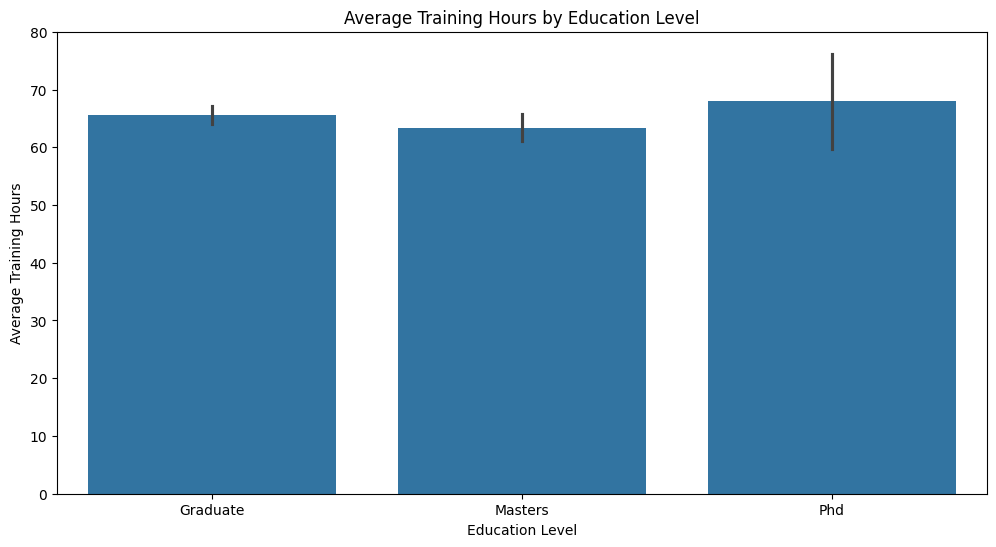

In [ ]:
# Bar plot of average training hours by education level
plt.figure(figsize=(12, 6))
sns.barplot(x='education_level', y='training_hours', data=aug_train_dropped)
plt.title('Average Training Hours by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Training Hours')
plt.show()

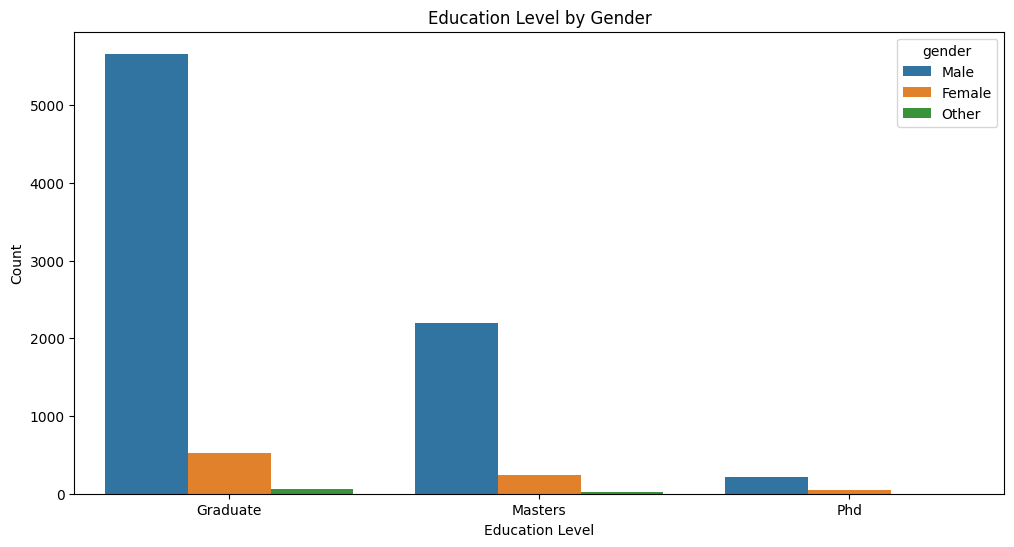

In [ ]:
# Bar plot of education level by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='education_level', hue='gender', data=aug_train_dropped)
plt.title('Education Level by Gender')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

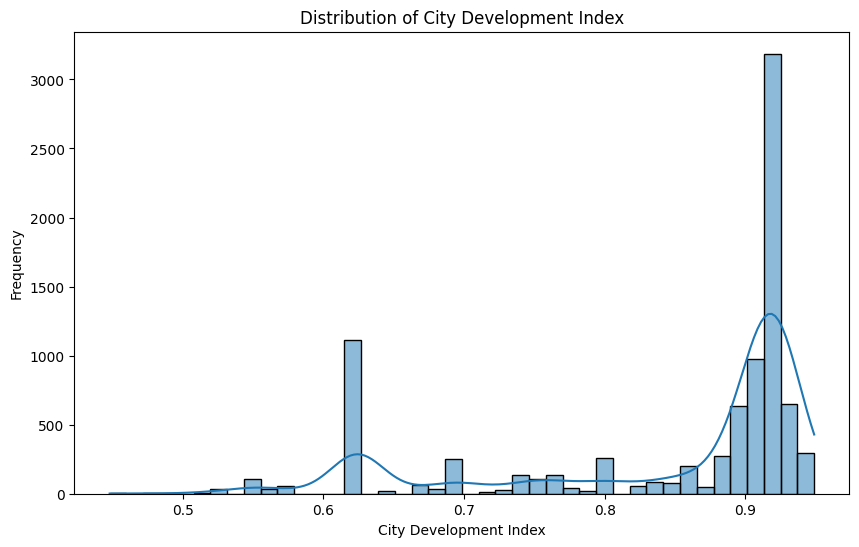

In [ ]:
# Histogram for city development index
plt.figure(figsize=(10, 6))
sns.histplot(aug_train_dropped['city_development_index'], kde=True)
plt.title('Distribution of City Development Index')
plt.xlabel('City Development Index')
plt.ylabel('Frequency')
plt.show()

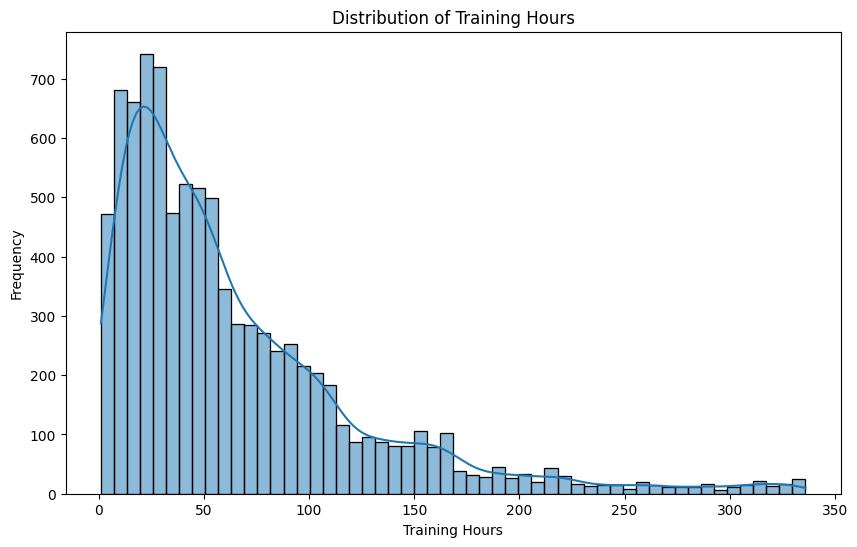

In [ ]:
# Histogram for training hours
plt.figure(figsize=(10, 6))
sns.histplot(aug_train_dropped['training_hours'], kde=True)
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Frequency')
plt.show()

<ipython-input-21-d97a11de3d61>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aug_train_dropped['training_hours'], shade=True)


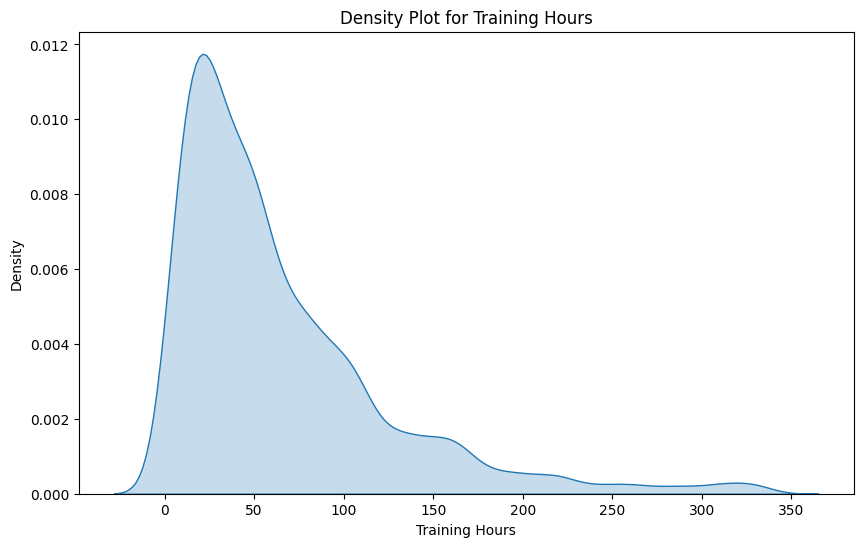

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(aug_train_dropped['training_hours'], shade=True)
plt.title('Density Plot for Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.show()

# Explore Company Type

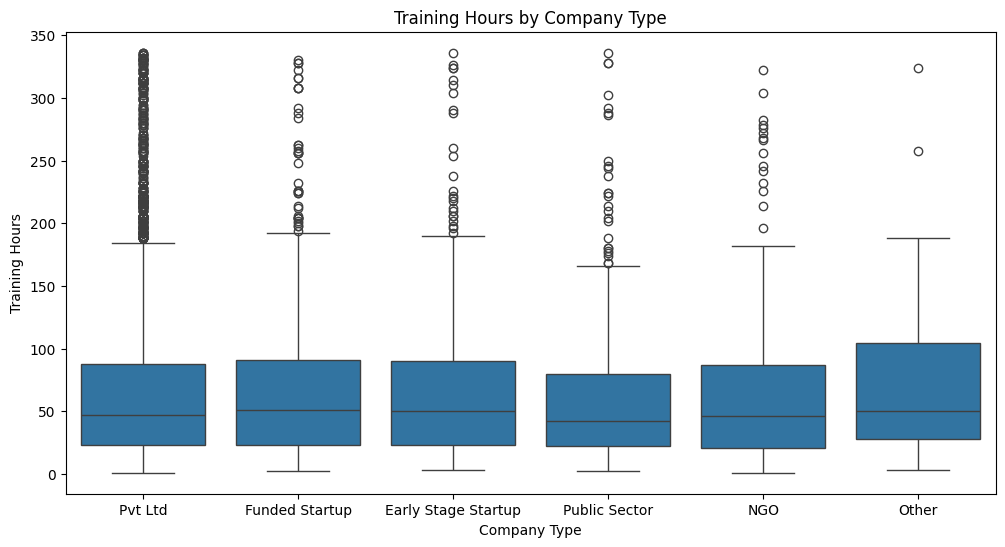

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_type', y='training_hours', data=aug_train_dropped)
plt.title('Training Hours by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Training Hours')
plt.show()

# Explore Company Size

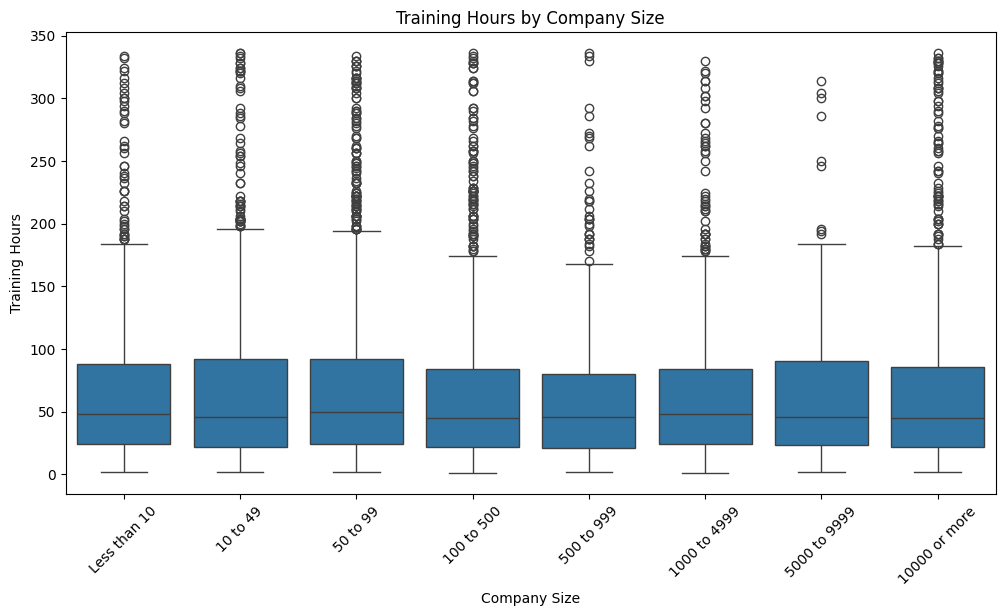

In [ ]:
# 2. Box plot: Training Hours by Company Size
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_size', y='training_hours', data=aug_train_dropped, order=size_order)
plt.title('Training Hours by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Training Hours')
plt.xticks(rotation=45)
plt.show()

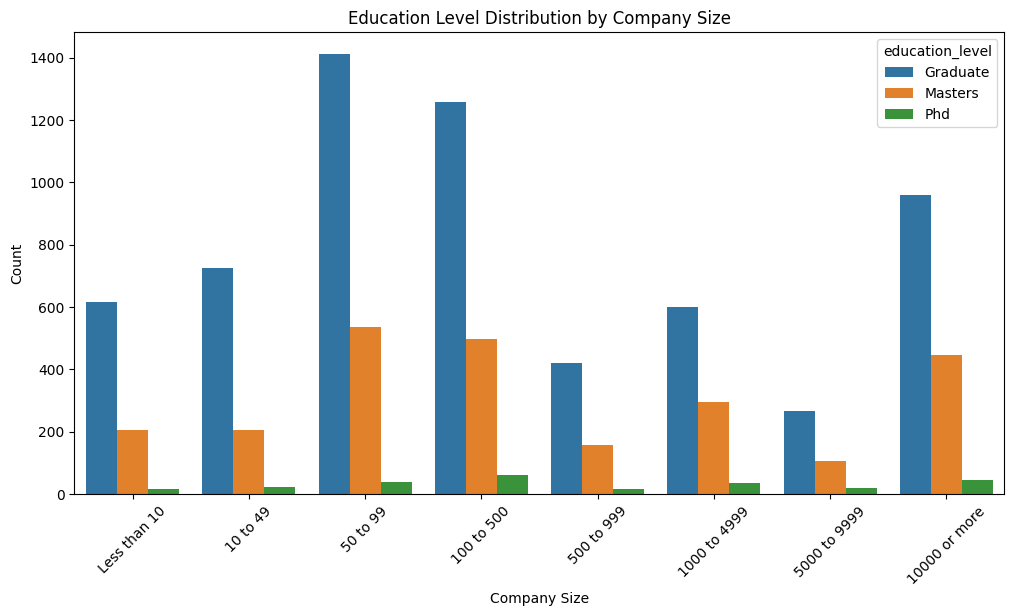

In [ ]:
# 3. Count plot: Company Size vs. Education Level
plt.figure(figsize=(12, 6))
sns.countplot(x='company_size', hue='education_level', data=aug_train_dropped, order=size_order)
plt.title('Education Level Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Cart Model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

Accuracy: 0.86
Confusion Matrix:
[[760  51]
 [ 87  68]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       811
         1.0       0.57      0.44      0.50       155

    accuracy                           0.86       966
   macro avg       0.73      0.69      0.71       966
weighted avg       0.84      0.86      0.85       966



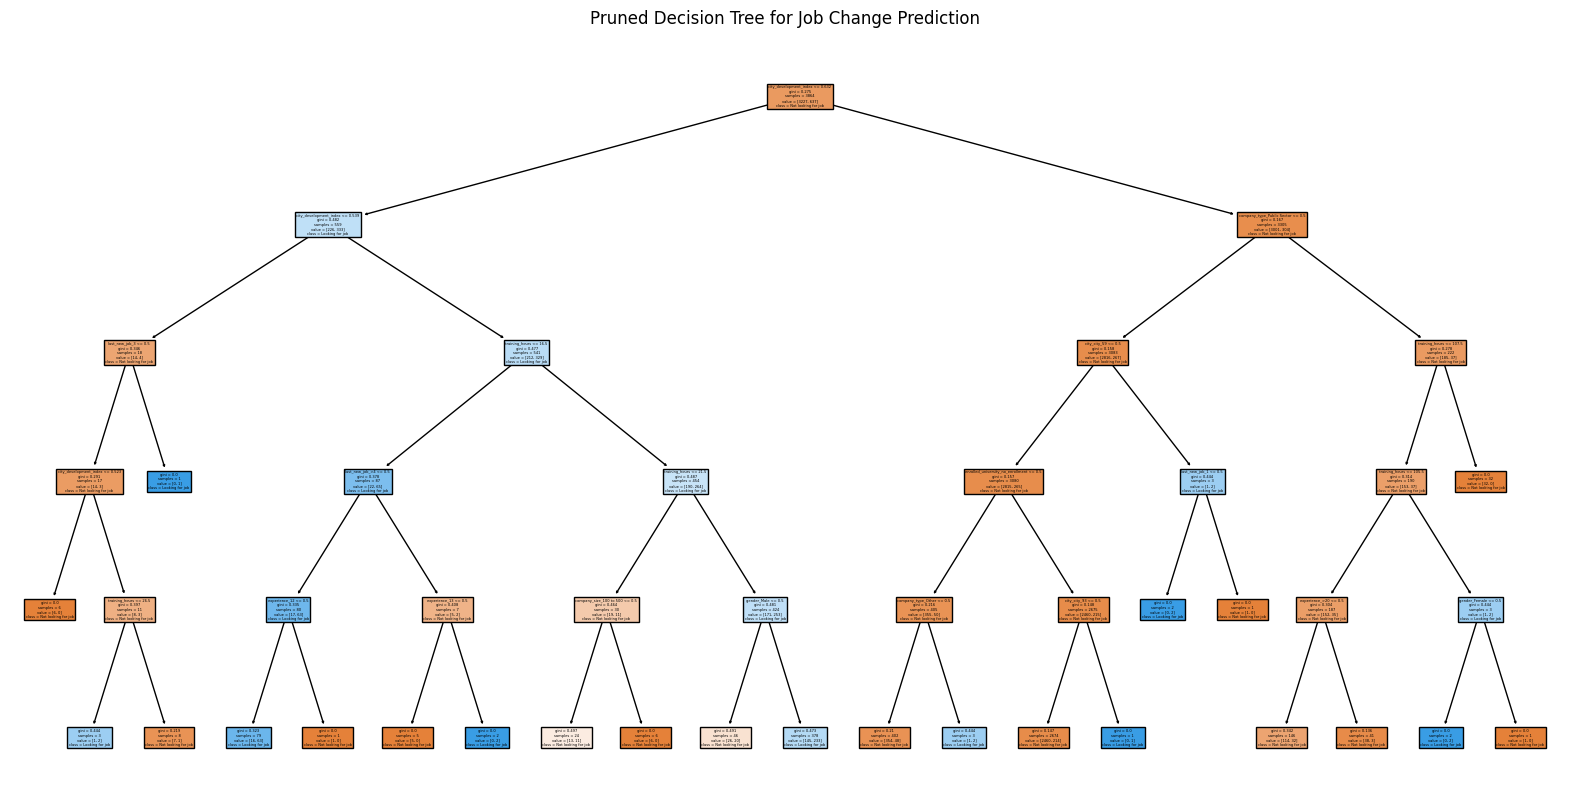

In [15]:
aug_train_dropped['company_size'] = aug_train_dropped['company_size'].replace('Oct-49', '10/49')

# company size mapping
company_size_mapping = {
    '<10': 'Less than 10',
    '10/49': '10 to 49',
    '50-99': '50 to 99',
    '100-500': '100 to 500',
    '500-999': '500 to 999',
    '1000-4999': '1000 to 4999',
    '5000-9999': '5000 to 9999',
    '10000+': '10000 or more'
}

aug_train_dropped['company_size'] = aug_train_dropped['company_size'].replace(company_size_mapping)

# Convert categorical variables to numeric using one-hot encoding
aug_train_encoded = pd.get_dummies(aug_train_dropped.drop(columns=['enrollee_id']))

# Separate features and target
X = aug_train_encoded.drop('target', axis=1)
y = aug_train_encoded['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier with pruning
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the pruned decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not looking for job', 'Looking for job'], filled=True)
plt.title("Pruned Decision Tree for Job Change Prediction")
plt.show()

# C5.0 Model

Accuracy: 0.86
Confusion Matrix:
[[754  57]
 [ 76  79]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       811
         1.0       0.58      0.51      0.54       155

    accuracy                           0.86       966
   macro avg       0.74      0.72      0.73       966
weighted avg       0.86      0.86      0.86       966



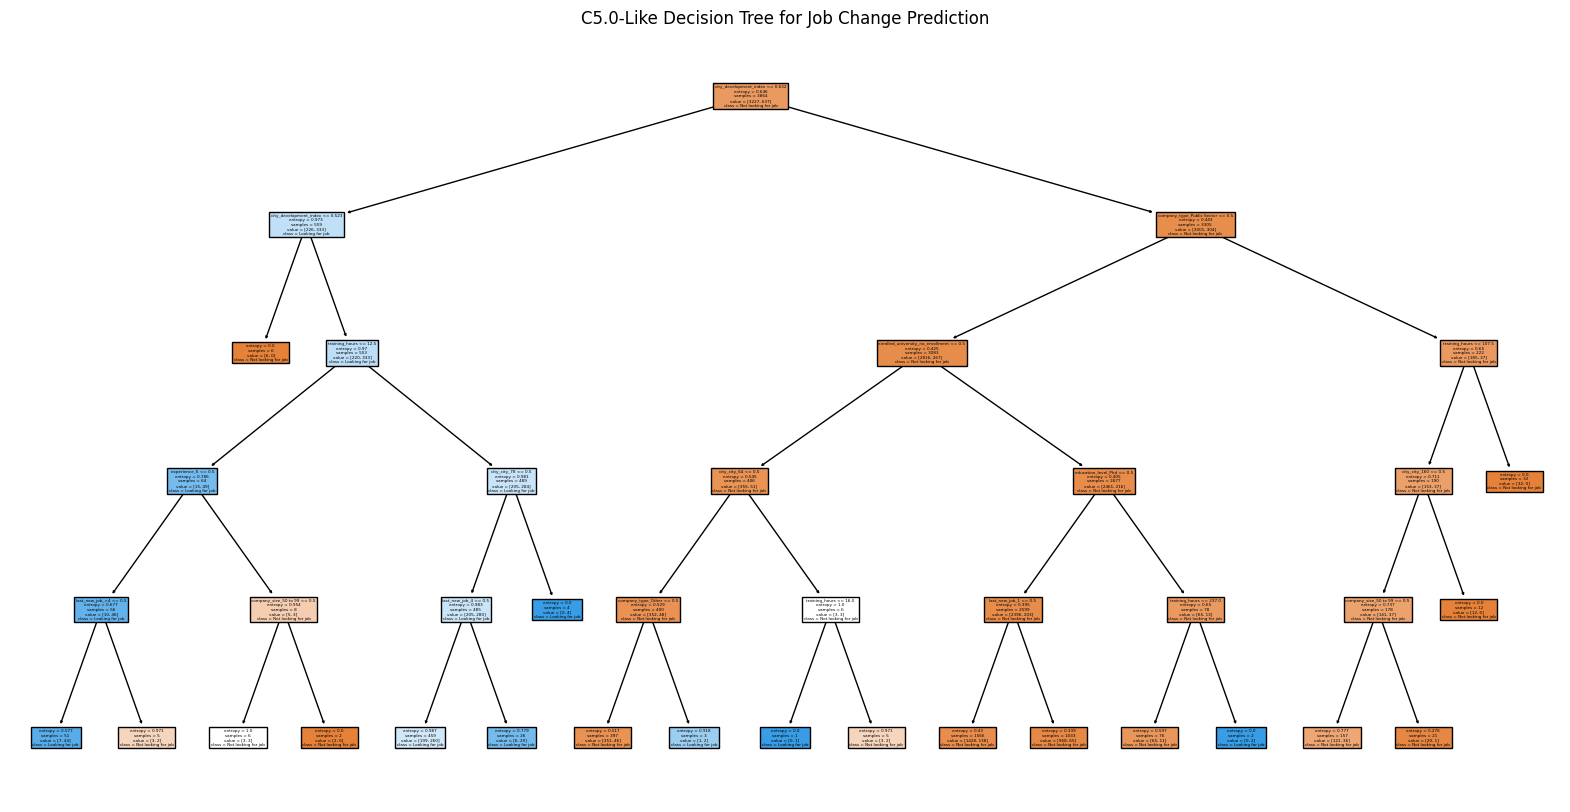

In [14]:
aug_train_dropped['company_size'] = aug_train_dropped['company_size'].replace('Oct-49', '10/49')

# company size mapping
company_size_mapping = {
    '<10': 'Less than 10',
    '10/49': '10 to 49',
    '50-99': '50 to 99',
    '100-500': '100 to 500',
    '500-999': '500 to 999',
    '1000-4999': '1000 to 4999',
    '5000-9999': '5000 to 9999',
    '10000+': '10000 or more'
}

aug_train_dropped['company_size'] = aug_train_dropped['company_size'].replace(company_size_mapping)

# Convert categorical variables to numeric using one-hot encoding
aug_train_encoded = pd.get_dummies(aug_train_dropped.drop(columns=['enrollee_id']))

# Separate features and target
X = aug_train_encoded.drop('target', axis=1)
y = aug_train_encoded['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier with entropy (C5.0-like)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not looking for job', 'Looking for job'], filled=True)
plt.title("C5.0-Like Decision Tree for Job Change Prediction")
plt.show()